In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib notebook

In [55]:
def f(y, t, params):
    Ntot, Nqll = y      # unpack current values of y
    Vkin = params[0]
    Nstar = params[1]
    Nbar = params[2]
    SigmaIcorner = params[3]
    SigmaMV0 = params[4]
  # unpack parameters
    derivs = [(((SigmaIcorner-(((Nqll - (Nbar - Nstar))/(2*Nstar) ))*SigmaMV0))/(1+(((Nqll - (Nbar - Nstar))/(2*Nstar) ))*SigmaMV0))*Vkin, (((SigmaIcorner-(((Nqll - (Nbar - Nstar))/(2*Nstar)) *SigmaMV0))/(1+(((Nqll - (Nbar - Nstar))/(2*Nstar) )*SigmaMV0)))*Vkin*2*np.pi*(-Nstar*np.cos(Ntot*2*np.pi)))]
    return derivs


In [56]:
#parameters
Vkin = 0.16
Nbar = 1
Nstar = .014
SigmaIcorner = 0.20
SigmaMV0 = 0.19

#initial values
Nqll0 = 0
Ntot0 = 2


# Bundle parameters for ODE solver
params = [Vkin,nNstar, Nbar, SigmaIcorner, SigmaMV0]

# Bundle initial conditions for ODE solver
y0 = [Nqll0, Ntot0]

# Make time array for solution
tStop = 20.
tInc = .001
t = np.arange(0., tStop, tInc)


In [57]:
trange = np.arange(0,tStop,tInc) 

Ntotn = Ntot0
Nqlln = Nqll0
Ntotsoln = np.zeros(len(trange))
Nqllsoln = np.zeros(len(trange))
for i in range(len(trange)): 
    Ntotnext = Ntot0 + tInc*(((SigmaIcorner-(((Nqlln - (Nbar - Nstar))/(2*Nstar) ))*SigmaMV0))/(1+(((Nqlln - (Nbar - Nstar))/(2*Nstar) ))*SigmaMV0))*Vkin
    Nqllnext = Nqll0 + tInc*(((SigmaIcorner-(((Nqlln - (Nbar - Nstar))/(2*Nstar)) *SigmaMV0))/(1+(((Nqlln - (Nbar - Nstar))/(2*Nstar) )*SigmaMV0)))*Vkin*2*np.pi*(-Nstar*np.cos(Ntotn*2*np.pi)))
    Ntotsoln[i]=Ntotnext
    Nqllsoln[i]=Nqllnext
    Ntotn = Ntotnext
    Nqlln = Nqllnext

<IPython.core.display.Javascript object>


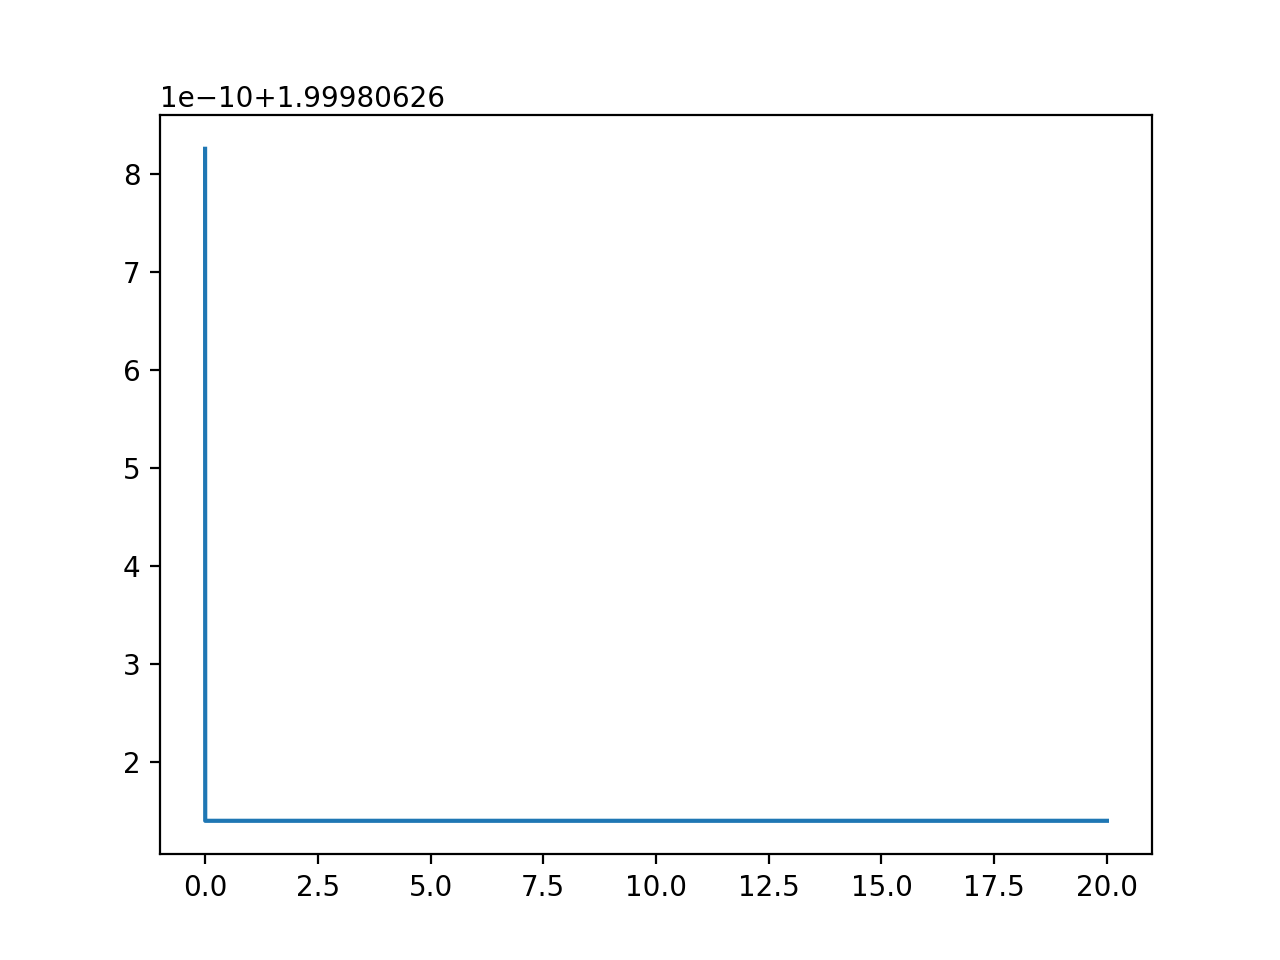

<IPython.core.display.Javascript object>


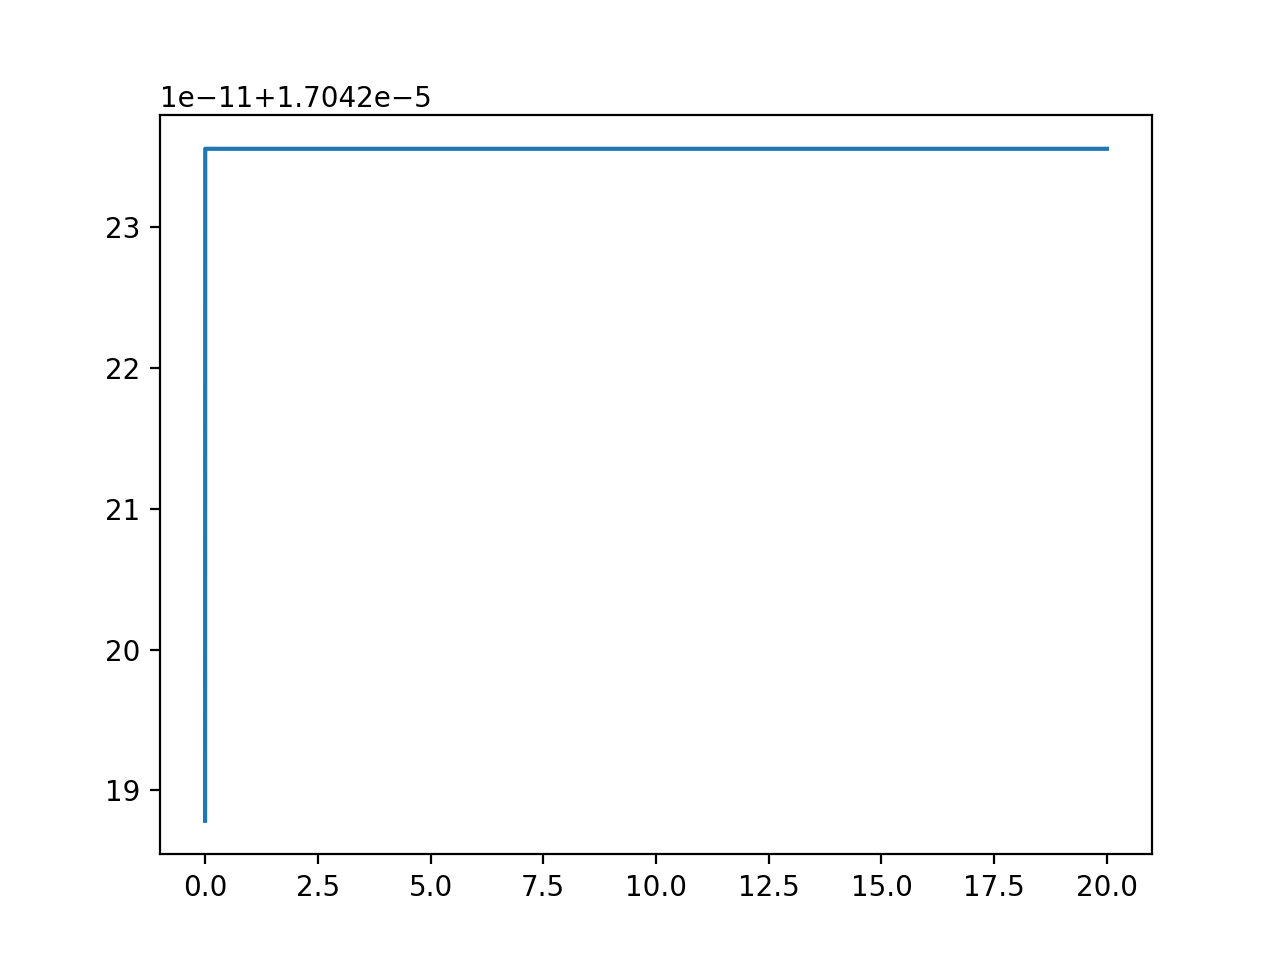

In [58]:
# Plot results


# Plot theta as a function of time\
plt.figure()
plt.plot(trange, Ntotsoln)

# Plot omega as a function of 
plt.figure()
plt.plot(trange, Nqllsoln)
